In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv("D:/ANACONDA3/envs/py_main/AIML/titanic.csv")

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [7]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [8]:
df.shape

(891, 12)

In [9]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [10]:
# Count the number of null values in each column
null_counts = df.isnull().sum()

# Display the result
print(null_counts)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [11]:
# replace the null values of age with its mean
df['Age'].fillna(df['Age'].median(), inplace=True) # nan are replaced with median cause it will be less affected by outliers

In [12]:
# replace null values in cabin column with 'unknown'
df['Cabin'].fillna('unknown', inplace=True) # inplae = True, means make changes in original dataset.

In [13]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       2
dtype: int64

In [14]:
df.shape

(891, 12)

In [15]:
# survive box plot
count = df['Survived'].value_counts()
count

Survived
0    549
1    342
Name: count, dtype: int64

In [16]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,unknown,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,unknown,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,unknown,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,unknown,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,unknown,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Text(0, 0.5, 'class')

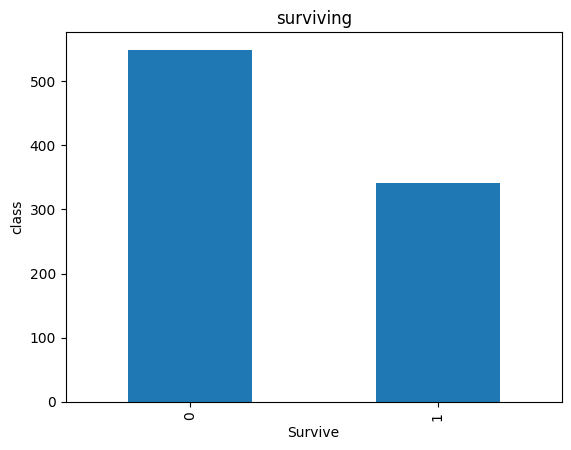

In [176]:
ax=df['Survived'].value_counts().head(10).plot(kind='bar',title='surviving') # bar plot  - for categorical data
ax.set_xlabel('Survive')
ax.set_ylabel('class')

Text(0, 0.5, 'class')

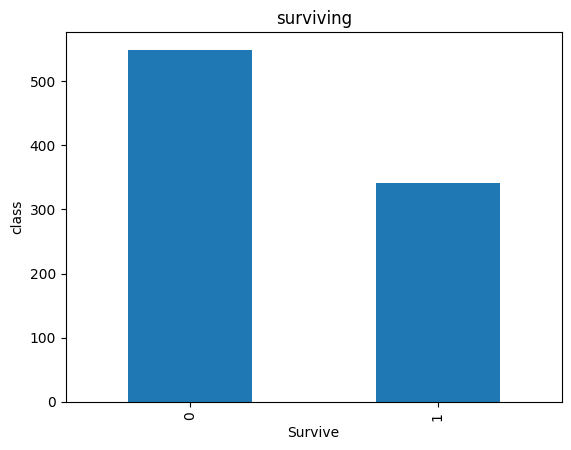

In [18]:
ax=df['Survived'].value_counts().plot(kind='bar',title='surviving') # bar plot  - for categorical data
ax.set_xlabel('Survive')
ax.set_ylabel('class')

In [19]:
df=df.drop(['Name','Embarked'],axis=1) # axis=1 means column 
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,unknown
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,unknown
3,4,1,1,female,35.0,1,0,113803,53.1000,C123
4,5,0,3,male,35.0,0,0,373450,8.0500,unknown
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,211536,13.0000,unknown
887,888,1,1,female,19.0,0,0,112053,30.0000,B42
888,889,0,3,female,28.0,1,2,W./C. 6607,23.4500,unknown
889,890,1,1,male,26.0,0,0,111369,30.0000,C148


In [20]:
df_corr = df[['PassengerId','Survived','Pclass','Age','SibSp','Parch','Fare']].corr()
# It helps us understand the relationship between two variables and the extent to which one variable can predict the other
df_corr

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.034212,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.064910,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.339898,0.083081,0.018443,-0.549500
Age,0.034212,-0.064910,-0.339898,1.000000,-0.233296,-0.172482,0.096688
SibSp,-0.057527,-0.035322,0.083081,-0.233296,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.172482,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096688,0.159651,0.216225,1.000000


<Axes: >

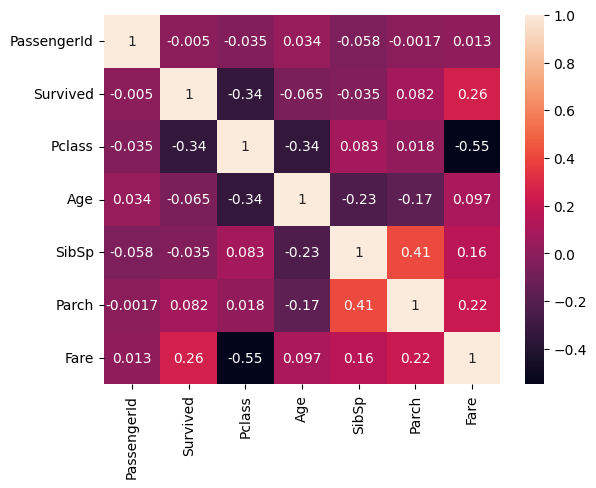

In [179]:
sns.heatmap(df_corr,annot=True)

<Axes: >

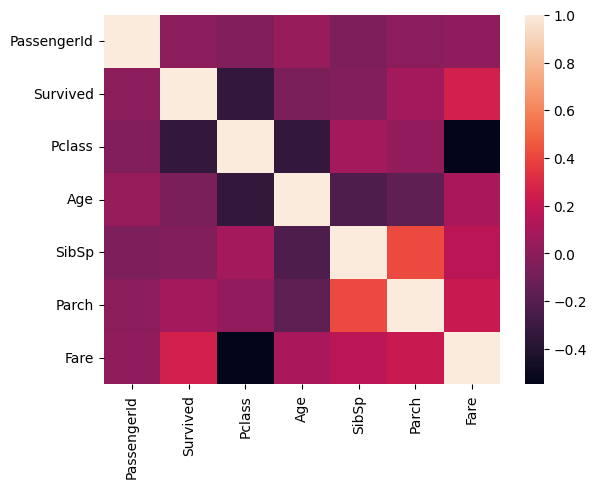

In [21]:
sns.heatmap(df_corr)

In [22]:
#remove columns that are >0.9 and >-0.9
df1=df_corr.drop(['SibSp','Parch','Fare'],axis=1) # axis=1 means columns
df1

,PassengerId,Survived,Pclass,Age
PassengerId,1.000000,-0.005007,-0.035144,0.034212
Survived,-0.005007,1.000000,-0.338481,-0.064910
Pclass,-0.035144,-0.338481,1.000000,-0.339898
Age,0.034212,-0.064910,-0.339898,1.000000
SibSp,-0.057527,-0.035322,0.083081,-0.233296
Parch,-0.001652,0.081629,0.018443,-0.172482
Fare,0.012658,0.257307,-0.549500,0.096688


In [23]:
Q1 = np.percentile(df['Age'],25,
                    interpolation = 'midpoint')
Q3 = np.percentile(df['Age'],75,
                      interpolation = 'midpoint')
IQR = Q3 - Q1

upper=Q3+1.5*IQR
lower=Q1-1.5*IQR
print(upper,lower)

54.5 2.5


In [24]:
df.Age=np.where(df.Age>upper,upper,np.where(df.Age<lower,lower,df.Age)) # changing outliers to upperbound

<Axes: ylabel='Age'>

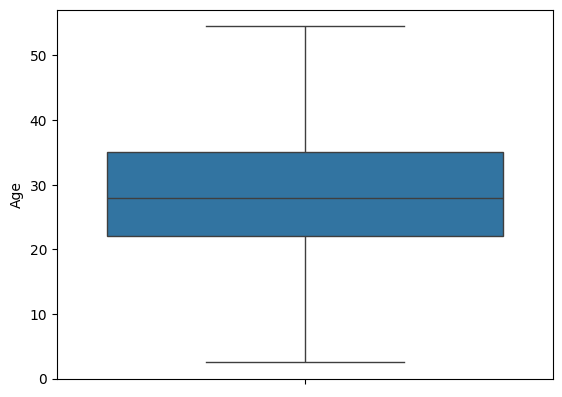

In [25]:
sns.boxplot(df['Age'])

In [26]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,unknown
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,unknown
3,4,1,1,female,35.0,1,0,113803,53.1000,C123
4,5,0,3,male,35.0,0,0,373450,8.0500,unknown
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,211536,13.0000,unknown
887,888,1,1,female,19.0,0,0,112053,30.0000,B42
888,889,0,3,female,28.0,1,2,W./C. 6607,23.4500,unknown
889,890,1,1,male,26.0,0,0,111369,30.0000,C148


In [27]:
df=df.drop(['SibSp','Parch','Ticket','Fare',],axis=1)

In [28]:
df['Sex'] = df['Sex'].replace('male', 0)
df['Sex'] = df['Sex'].replace('female', 1)

In [29]:
df

,PassengerId,Survived,Pclass,Sex,Age,Cabin
0,1,0,3,0,22.0,unknown
1,2,1,1,1,38.0,C85
2,3,1,3,1,26.0,unknown
3,4,1,1,1,35.0,C123
4,5,0,3,0,35.0,unknown
...,...,...,...,...,...,...
886,887,0,2,0,27.0,unknown
887,888,1,1,1,19.0,B42
888,889,0,3,1,28.0,unknown
889,890,1,1,0,26.0,C148


In [31]:
nc=preprocessing.LabelEncoder()
df.Cabin=nc.fit_transform(df.Cabin)
df
df['Cabin'].value_counts()

Cabin
147    687
63       4
145      4
47       4
62       3
      ... 
124      1
76       1
72       1
125      1
60       1
Name: count, Length: 148, dtype: int64

In [32]:
from sklearn import preprocessing

# Sample data
categories = ['S34', 'S43', 'S20', 'S34', 'S20']

# Initialize LabelEncoder
le = preprocessing.LabelEncoder()

# Fit and transform the data
encoded_labels = le.fit_transform(categories)

# Display the unique categories, their corresponding labels, and the transformed data
print("Unique Categories:", le.classes_)
print("Encoded Labels:", encoded_labels)


Unique Categories: ['S20' 'S34' 'S43']
Encoded Labels: [1 2 0 1 0]


In [33]:
Y=df['Survived']
X=df.drop(['Survived'],axis=1)
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.20,random_state=1)

In [35]:
sc=preprocessing.StandardScaler()
x_train=sc.fit_transform(x_train)


In [37]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Sample data
data = {'Feature1': [1, 2, 3, 4, 5],
        'Feature2': [10, 20, 30, 40, 50]}

df = pd.DataFrame(data)

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the data
scaled_data = scaler.fit_transform(df)

# Display the original and scaled data
print("Original Data:")
print(df)
print("\nScaled Data:")
print(pd.DataFrame(scaled_data, columns=df.columns))
Computes Mean and Standard Deviation:

# During the fitting step (fit method), StandardScaler computes the mean and standard deviation of each feature in the training data.
# Standardization:

# During the transforming step (transform method), StandardScaler applies the transformation to each feature by subtracting the mean 
# and dividing by the standard deviation.
# The standardized values have a mean of 0 and a standard deviation of 1.

Original Data:
   Feature1  Feature2
0         1        10
1         2        20
2         3        30
3         4        40
4         5        50

Scaled Data:
   Feature1  Feature2
0 -1.414214 -1.414214
1 -0.707107 -0.707107
2  0.000000  0.000000
3  0.707107  0.707107
4  1.414214  1.414214


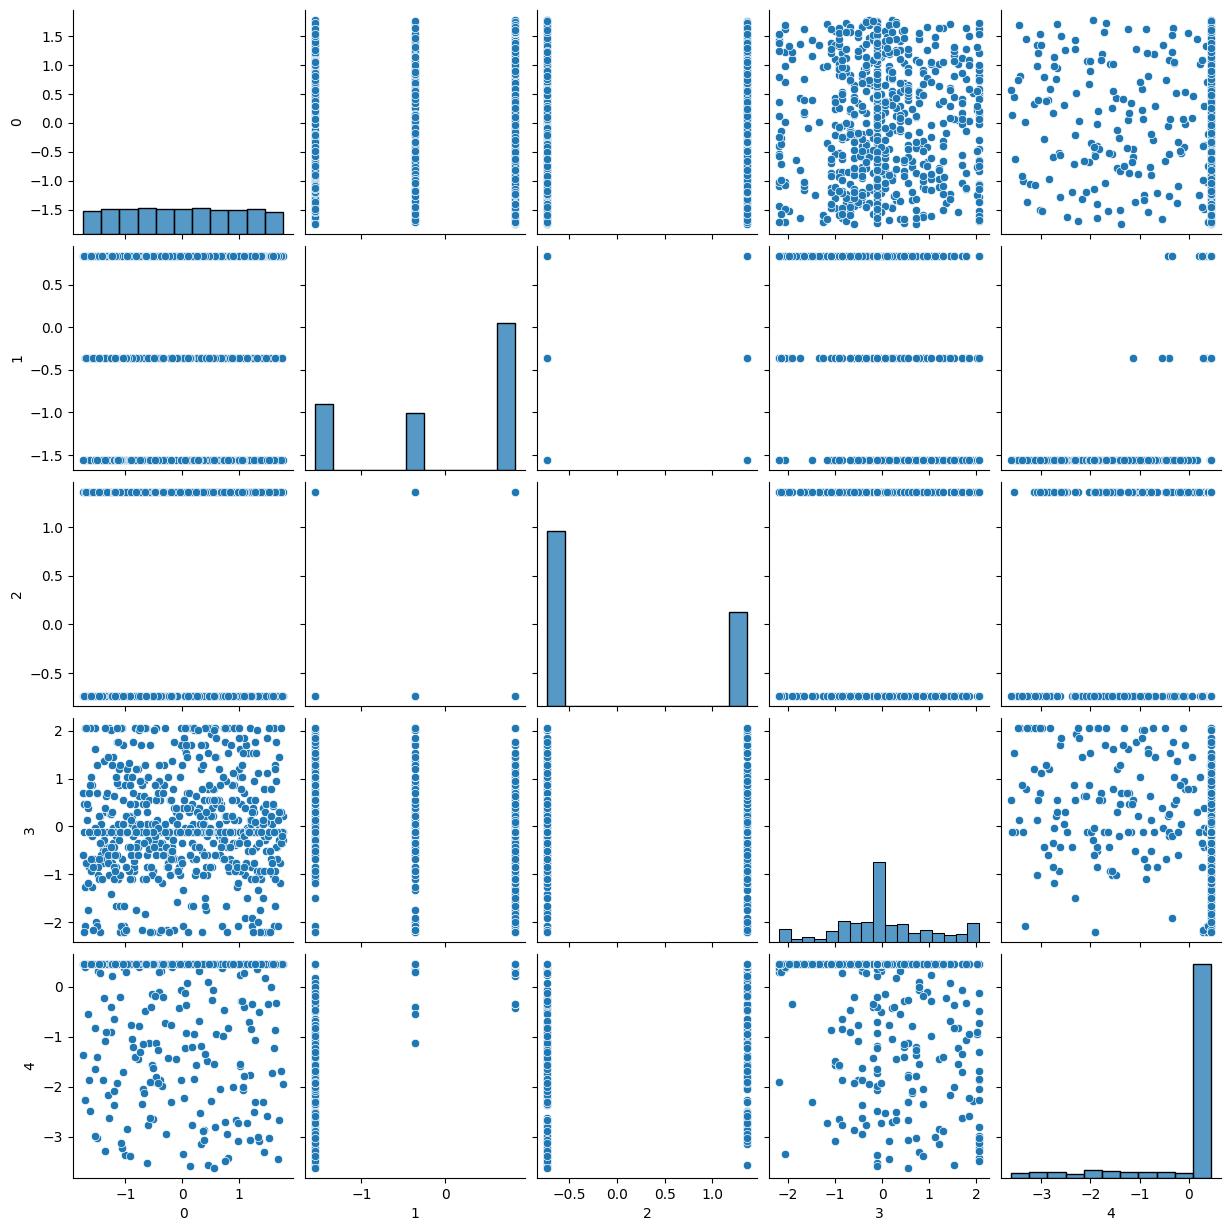

In [40]:
x_train_df=pd.DataFrame(x_train)
x_train_df=pd.DataFrame(x_train)
sns.pairplot(x_train_df,vars=[0,1,2,3,4])
# vars=[0, 1, 2, 3, 4] specifies that you want to create pairwise plots for the columns with indices 0, 1, 2, 3, and 4